In [15]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [16]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=234f3c1e4780ba00820cbf3daf1c4692


In [18]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

61.95188094928076 -50.124861230999784
-68.34255529880565 -88.90665028822593
-77.522149537254 141.3876291448371
77.46362261887785 -116.66834119205829
-81.39498639869674 172.784347702903
88.37190885962355 176.69929915523056
-82.92976508143454 -50.04845380755111
37.496774976246556 -86.89624683945536
46.39107781690083 72.13178030706104
-10.048222968249803 -107.77031266056767
63.70757945170374 173.69842424362383
70.86164230738547 48.54484075348984
87.66402612305788 18.420007422805014
0.8639356286796698 -69.02832988137924
69.84541221743464 81.56478003939333
80.09611837027217 -111.88277528242057
36.25361811737062 0.6811688948565688
10.392035798535105 76.31065842459327
-19.09040944497916 171.08701350968607
-60.9538178183434 -62.40139077732846
-71.54445039878723 168.25633887367712
43.225705345814845 112.01544923946818
78.56905820321595 159.51733337914504
12.77699518555525 -57.889886279111124
80.2939915238043 120.74819369793397
18.82682564306674 -158.75544175651768
23.246300721564097 101.2161207

In [22]:
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

599

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | paamiut
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | leningradskiy
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | owensboro
Processing Record 9 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | mitu
Processing Record 15 of Set 1 | karaul
City not found. Skipping...
Processing Record 16 of Set 1 | sidi ali
Processing Record 17 of Set 1 | irinjalakuda
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | erenhot
Processing Record 20 of Set 1 | cherskiy
Processing Record 21 of Set 1 | oistins
Processing Record 22 of Set 1 | saskylakh
Processi

Processing Record 39 of Set 4 | santa rosa
Processing Record 40 of Set 4 | mount gambier
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | rafaela
Processing Record 44 of Set 4 | xadani
City not found. Skipping...
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | dzaoudzi
Processing Record 47 of Set 4 | constitucion
Processing Record 48 of Set 4 | arman
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | kuche
City not found. Skipping...
Processing Record 1 of Set 5 | guangyuan
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | jacmel
Processing Record 4 of Set 5 | moose factory
Processing Record 5 of Set 5 | santa barbara
Processing Record 6 of Set 5 | stralsund
Processing Record 7 of Set 5 | qaanaaq
Processing Record 8 of Set 5 | atar
Processing Record 9 of Set 5 | ishigaki
Processing Record 10 of Set 5 | toora-khem
Processing Record 11 

Processing Record 26 of Set 8 | coquimbo
Processing Record 27 of Set 8 | muli
Processing Record 28 of Set 8 | zhangye
Processing Record 29 of Set 8 | kokopo
Processing Record 30 of Set 8 | padang
Processing Record 31 of Set 8 | oliver
Processing Record 32 of Set 8 | neuruppin
Processing Record 33 of Set 8 | toungoo
City not found. Skipping...
Processing Record 34 of Set 8 | ballina
Processing Record 35 of Set 8 | pisco
Processing Record 36 of Set 8 | ilulissat
Processing Record 37 of Set 8 | morant bay
Processing Record 38 of Set 8 | marquette
Processing Record 39 of Set 8 | atikokan
Processing Record 40 of Set 8 | nguiu
City not found. Skipping...
Processing Record 41 of Set 8 | pontianak
Processing Record 42 of Set 8 | maloy
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 45 of Set 8 | goya
Processing Record 46 of Set 8 | san cristobal
Processing Record 47 of Set 8 | tonota
Processing Record

Processing Record 16 of Set 12 | codrington
Processing Record 17 of Set 12 | tazovskiy
Processing Record 18 of Set 12 | okato
Processing Record 19 of Set 12 | puerto maldonado
Processing Record 20 of Set 12 | amarastii de sus
Processing Record 21 of Set 12 | rioja
Processing Record 22 of Set 12 | nyurba
Processing Record 23 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 24 of Set 12 | ngunguru
Processing Record 25 of Set 12 | palmer
Processing Record 26 of Set 12 | cayenne
Processing Record 27 of Set 12 | kindu
Processing Record 28 of Set 12 | wajima
Processing Record 29 of Set 12 | patnagarh
Processing Record 30 of Set 12 | leh
Processing Record 31 of Set 12 | dusetos
Processing Record 32 of Set 12 | tukrah
Processing Record 33 of Set 12 | vao
Processing Record 34 of Set 12 | bartica
Processing Record 35 of Set 12 | vila franca do campo
Processing Record 36 of Set 12 | zhigalovo
Processing Record 37 of Set 12 | zacualpan
Processing Record 38 of Set 12 | pandan nio

In [26]:
len(city_data)

551

In [27]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Paamiut,61.9940,-49.6678,34.88,97,100,5.39,GL,2022-05-12 17:24:42
1,Punta Arenas,-53.1500,-70.9167,46.42,87,75,13.80,CL,2022-05-12 17:22:08
2,Hobart,-42.8794,147.3294,49.05,92,54,1.14,AU,2022-05-12 17:24:43
3,Yellowknife,62.4560,-114.3525,39.72,70,75,12.66,CA,2022-05-12 17:24:43
4,Bluff,-46.6000,168.3333,49.80,83,100,13.53,NZ,2022-05-12 17:24:44
5,Leningradskiy,69.3833,178.4167,17.64,91,94,7.43,RU,2022-05-12 17:24:45
6,Ushuaia,-54.8000,-68.3000,44.22,100,75,3.44,AR,2022-05-12 17:24:45
7,Owensboro,37.7742,-87.1133,87.03,37,0,4.61,US,2022-05-12 17:23:48
8,Puerto Ayora,-0.7393,-90.3518,80.56,88,65,1.99,EC,2022-05-12 17:24:46
9,Anadyr,64.7500,177.4833,30.70,86,0,15.66,RU,2022-05-12 17:24:47


In [28]:
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]

In [29]:
city_data_df=city_data_df[new_column_order]

In [30]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Paamiut,GL,2022-05-12 17:24:42,61.9940,-49.6678,34.88,97,100,5.39
1,Punta Arenas,CL,2022-05-12 17:22:08,-53.1500,-70.9167,46.42,87,75,13.80
2,Hobart,AU,2022-05-12 17:24:43,-42.8794,147.3294,49.05,92,54,1.14
3,Yellowknife,CA,2022-05-12 17:24:43,62.4560,-114.3525,39.72,70,75,12.66
4,Bluff,NZ,2022-05-12 17:24:44,-46.6000,168.3333,49.80,83,100,13.53
...,...,...,...,...,...,...,...,...,...
546,Gondanglegi,ID,2022-05-12 17:40:13,-7.7479,112.0132,76.28,94,82,4.14
547,Husavik,IS,2022-05-12 17:40:13,66.0449,-17.3389,32.77,98,100,21.21
548,Ambon,ID,2022-05-12 17:40:14,-3.6954,128.1814,77.14,94,40,3.44
549,Joensuu,FI,2022-05-12 17:40:14,62.6012,29.7632,46.89,93,0,4.61


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

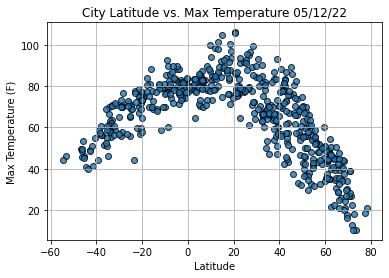

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

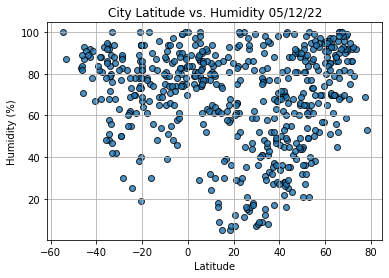

In [35]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

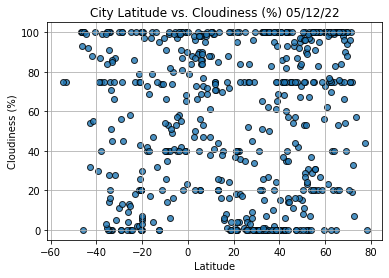

In [36]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

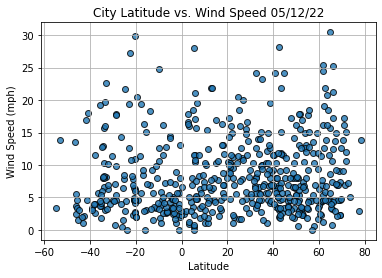

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()